## Explore PubAG API

In [30]:
import requests
import json
import pandas as pd
import numpy as np
import time
from collections import Counter

In [2]:
API_KEY = "jGgEv0rYItqngfgOd9eF9HN5GoCDRxTzB64slFdL"

In [47]:
with open('pubag_abs_dict.json', 'r') as read_file:
    abstract_dict = json.load(read_file)
print(len(abstract_dict['id']))

973


In [46]:
with open('pubag_abs_dict.json', 'r') as read_file:
    abstract_dict = json.load(read_file)

start_len = len(abstract_dict['id'])
keywords = "convolutional+neural+networks"
#put convolutional neural network. CNN stands for Cheyenne or aminés (chemistry) etc
response = requests.get("https://api.nal.usda.gov/pubag/rest/search/?query={}&per_page=100&api_key={}".format(keywords, API_KEY)).json()
totalpages = response["request"]["totalPages"]

for i in range (totalpages):
    response = requests.get("https://api.nal.usda.gov/pubag/rest/search/?query={}&page={}&per_page=100&api_key={}".format(keywords, i+1, API_KEY)).json()
    for j in range (len(response['resultList'])):
        abs_id = response['resultList'][j]['id']
        if abs_id not in abstract_dict['id']:
            try:
                abstract_dict['id'].append(abs_id)
                abstract_dict['titles'].append(response['resultList'][j]['title'])
                abstract_dict['abstracts'].append(response['resultList'][j]['abstract'])
                abstract_dict['authors'].append((response['resultList'][j]['author']))
                abstract_dict['keywords'].append((keywords))
                abstract_dict['subject'].append((response['resultList'][j]['subject']))
                abstract_dict['date'].append((response['resultList'][j]['date']))
                abstract_dict['sources'].append((response['resultList'][j]['journal']))
            except:
                print(abs_id, " didn't work")
end_len = len(abstract_dict['id'])

print("added {} abstracts".format(end_len-start_len))


with open('pubag_abs_dict.json', 'w+') as f:
    json.dump(abstract_dict, f) 

added 950 abstracts


In [12]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#NOTE: only run this cell if you want to start from zero again with the abs_dict!!!!!!!!!!!!!!!!!!

abs_dict = {'id': [], 'titles': [], 'abstracts': [], 'authors': [], 'keywords': [], 'subject': [], 'date': [], 'sources':[]}
with open('pubag_abs_dict.json', 'w+') as f:
    json.dump(abs_dict, f) 

In [14]:
for i in range (9):
    print(abstract_dict['abstracts'][i])

Improving the accuracy of edge pixel classification is crucial for extracting the winter wheat spatial distribution from remote sensing imagery using convolutional neural networks (CNNs). In this study, we proposed an approach using a partly connected conditional random field model (PCCRF) to refine the classification results of RefineNet, named RefineNet-PCCRF. First, we used an improved RefineNet model to initially segment remote sensing images, followed by obtaining the category probability vectors for each pixel and initial pixel-by-pixel classification result. Second, using manual labels as references, we performed a statistical analysis on the results to select pixels that required optimization. Third, based on prior knowledge, we redefined the pairwise potential energy, used a linear model to connect different levels of potential energies, and used only pixel pairs associated with the selected pixels to build the PCCRF. The trained PCCRF was then used to refine the initial pixel

In [51]:
with open('pubag_abs_dict.json', 'r') as read_file:
    abstract_dict = json.load(read_file)
print(len(abstract_dict['id']))

973


In [54]:
abstract_df = pd.DataFrame.from_dict(abstract_dict)
abstract_df.head()
print(abstract_df.shape)

(973, 8)


0.05289030075073242


/home/martin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


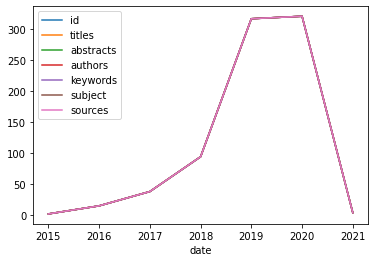

In [55]:
start = time.time()
inter_df = abstract_df[abstract_df['abstracts'].str.contains("convolutional")]
inter_df.head()



years = list(inter_df['date'])
for i in range (len(years)):
    years[i] = years[i][:4]
inter_df['date'] = years
inter_df.groupby('date').count().plot()
end = time.time()
print(end-start)

0.04758715629577637


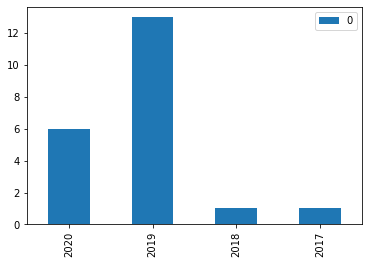

In [56]:
start = time.time()
indices = [i for i, x in enumerate(abstract_dict["abstracts"]) if "wheat" in x]
dates = [int(x[:4]) for i, x in enumerate(abstract_dict["date"]) if i in indices]

year_counts = Counter(dates)
year_df = pd.DataFrame.from_dict(year_counts, orient='index')
year_df.plot(kind='bar')
end = time.time()
print(end-start)

[2020, 2019, 2018, 2019, 2020, 2020, 2019, 2019, 2019, 2019, 2019, 2017, 2020, 2019, 2019, 2020, 2019, 2019, 2020, 2019, 2019]


In /home/martin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/martin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/martin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/martin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/martin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

<AxesSubplot:>

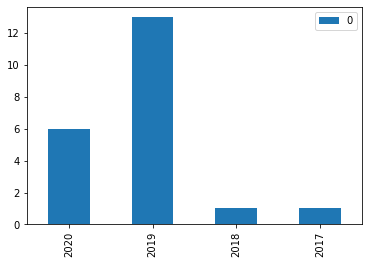